# Multiple Linear Regression - Cumulative Lab

## Introduction

In this cumulative lab you'll perform an end-to-end analysis of a dataset using multiple linear regression.

## Objectives

You will be able to:

* Prepare data for regression analysis using pandas
* Build multiple linear regression models using StatsModels
* Measure regression model performance
* Interpret multiple linear regression coefficients

## Your Task: Develop a Model of Diamond Prices

![tweezers holding a diamond](https://curriculum-content.s3.amazonaws.com/data-science/images/diamond.jpg)

Photo by <a href="https://unsplash.com/@tahliaclaire?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Tahlia Doyle</a> on <a href="https://unsplash.com/s/photos/diamonds?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

You've been asked to perform an analysis to see how various factors impact the price of diamonds. There are various [guides online](https://www.diamonds.pro/education/diamond-prices/) that claim to tell consumers how to avoid getting "ripped off", but you've been asked to dig into the data to see whether these claims ring true.

### Data Understanding

We have downloaded a diamonds dataset from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), which came with this description:

* **price** price in US dollars (\$326--\$18,823)
* **carat** weight of the diamond (0.2--5.01)
* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** diamond colour, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length in mm (0--10.74)
* **y** width in mm (0--58.9)
* **z** depth in mm (0--31.8)
* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* **table** width of top of diamond relative to widest point (43--95)

### Requirements

#### 1. Load the Data Using Pandas

Practice once again with loading CSV data into a `pandas` dataframe.

#### 2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with `price` and build a StatsModels linear regression model using just that feature.

#### 3. Evaluate and Interpret Baseline Model Results

Explain the overall performance as well as parameter coefficients for the baseline simple linear regression model.

#### 4. Prepare a Categorical Feature for Multiple Regression Modeling

Identify a promising categorical feature and use `pd.get_dummies()` to prepare it for modeling.

#### 5. Build a Multiple Linear Regression Model

Using the data from Step 4, create a second StatsModels linear regression model using one numeric feature and one one-hot encoded categorical feature.

#### 6. Evaluate and Interpret Multiple Linear Regression Model Results

Explain the performance of the new model in comparison with the baseline, and interpret the new parameter coefficients.

## 1. Load the Data Using Pandas

Import `pandas` (with the standard alias `pd`), and load the data from the file `diamonds.csv` into a DataFrame called `diamonds`.

Be sure to specify `index_col=0` to avoid creating an "Unnamed: 0" column.

In [9]:
import pandas as pd

# Load the dataset
diamonds = pd.read_csv('diamonds.csv', index_col=0)

# Display the first few rows of the dataset to verify loading
print(diamonds.head())


   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


The following code checks that you loaded the data correctly:

In [5]:
# Run this cell without changes

# diamonds should be a dataframe
assert type(diamonds) == pd.DataFrame

# Check that there are the correct number of rows
assert diamonds.shape[0] == 53940

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert diamonds.shape[1] == 10

Inspect the distributions of the numeric features:

In [6]:
# Run this cell without changes
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


And inspect the value counts for the categorical features:

In [7]:
# Run this cell without changes
categoricals = diamonds.select_dtypes("object")

for col in categoricals:
    print(diamonds[col].value_counts(), "\n")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 



## 2. Build a Baseline Simple Linear Regression Model

### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [17]:

# Load the dataset
diamonds = pd.read_csv('diamonds.csv', index_col=0)

# Convert categorical columns to numeric codes
categoricals = diamonds.select_dtypes("object")

for col in categoricals:
    diamonds[col] = pd.factorize(diamonds[col])[0]

# Calculate the correlation matrix
correlation_matrix = diamonds.corr()

# Extract the correlation values for the target variable 'price'
price_correlations = correlation_matrix["price"]

# Display the correlation values
print(price_correlations)

# Identify the predictor with the highest correlation with 'price'
# Ignoring the correlation of price with itself (which is always 1)
highest_correlation = price_correlations.abs().sort_values(ascending=False).index[1]
print(f"The predictor variable with the highest correlation with price is: {highest_correlation}")


carat      0.921591
cut        0.049421
color     -0.016560
clarity   -0.140270
depth     -0.010647
table      0.127134
price      1.000000
x          0.884435
y          0.865421
z          0.861249
Name: price, dtype: float64
The predictor variable with the highest correlation with price is: carat


Identify the name of the predictor column with the strongest correlation below.

In [19]:
# Replace None with appropriate code
most_correlated = highest_correlation
print({highest_correlation})

{'carat'}


The following code checks that you specified a column correctly:

In [20]:
# Run this cell without changes

# most_correlated should be a string
assert type(most_correlated) == str

# most_correlated should be one of the columns other than price
assert most_correlated in diamonds.drop("price", axis=1).columns

### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. `price`:

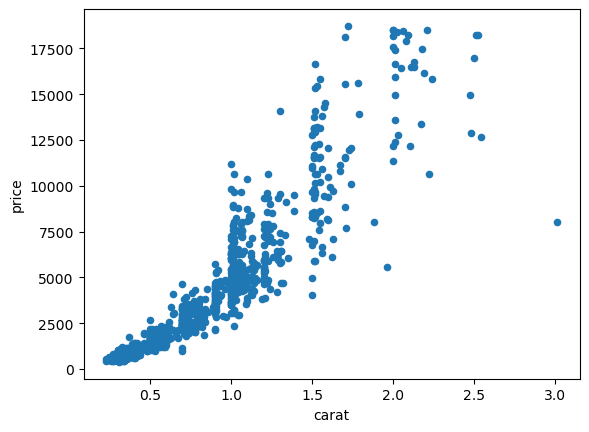

In [23]:
# Run this cell without changes

# Plot a sample of 1000 data points, most_correlated vs. price
diamonds.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");



### Setting Up Variables for Regression

Declare `y` and `X_baseline` variables, where `y` is a Series containing `price` data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [24]:

# Load the dataset
diamonds = pd.read_csv('diamonds.csv', index_col=0)

# Convert categorical columns to numeric codes
categoricals = diamonds.select_dtypes("object")
for col in categoricals:
    diamonds[col] = pd.factorize(diamonds[col])[0]

# Calculate the correlation matrix
correlation_matrix = diamonds.corr()

# Extract the correlation values for the target variable 'price'
price_correlations = correlation_matrix["price"]

# Identify the predictor with the highest correlation with 'price'
# Ignoring the correlation of price with itself (which is always 1)
highest_correlation = price_correlations.abs().sort_values(ascending=False).index[1]

# Declare y and X_baseline variables
y = diamonds['price']
X_baseline = diamonds[[highest_correlation]]

print(f"Target variable (y):\n{y.head()}")
print(f"Predictor variable (X_baseline):\n{X_baseline.head()}")


Target variable (y):
1    326
2    326
3    327
4    334
5    335
Name: price, dtype: int64
Predictor variable (X_baseline):
   carat
1   0.23
2   0.21
3   0.23
4   0.29
5   0.31


The following code checks that you created valid `y` and `X_baseline` variables:

In [25]:
# Run this code without changes

# y should be a series
assert type(y) == pd.Series

# y should contain about 54k rows
assert y.shape == (53940,)

# X_baseline should be a DataFrame
assert type(X_baseline) == pd.DataFrame

# X_baseline should contain the same number of rows as y
assert X_baseline.shape[0] == y.shape[0]

# X_baseline should have 1 column
assert X_baseline.shape[1] == 1

### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [31]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()


## 3. Evaluate and Interpret Baseline Model Results

Write any necessary code to evaluate the model performance overall and interpret its coefficients.

In [36]:
# Create and fit the simple linear regression model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

# Print the summary of the regression results
print(baseline_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:55:42   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

Then summarize your findings below:

1. Model Performance

R-squared
Value: 0.849
Interpretation:
This means that approximately 84.9% of the variability in price is explained by the predictor variable carat.
An R-squared value close to 1 indicates a good fit of the model to the data.


Adjusted R-squared
Value: 0.849
Interpretation: 
This is similar to R-squared but adjusts for the number of predictors in the model.
It indicates that the model's fit is quite good even after accounting for the number of predictors.

F-statistic and Prob (F-statistic)
F-statistic: 3.041e+05
Prob (F-statistic): 0.00
Interpretation:
The F-statistic tests the overall significance of the model. A very high F-statistic and a p-value close to 0 indicate that the model is statistically significant.


2. Coefficients

Intercept (const)
Coefficient: -2256.3606
Standard Error: 13.055
t-value: -172.830
p-value: 0.000
95% Confidence Interval: [-2281.949, -2230.772]

Interpretation: The intercept is the expected price when carat is zero. In this context, the negative value of the intercept might not be meaningful as carat cannot be zero in practical scenarios.

Coefficient of carat
Coefficient: 7756.4256
Standard Error: 14.067
t-value: 551.408
p-value: 0.000
95% Confidence Interval: [7728.855, 7783.996]

Interpretation: For each additional carat, the price is expected to increase by approximately $7756.43. This coefficient is statistically significant (p-value is 0.000), indicating a strong relationship between carat and price.

Summary
The model explains a substantial portion of the variability in diamond prices (R-squared = 0.849).
The carat variable is a strong predictor of price, with each additional carat adding approximately $7756.43 to the price of the diamond.
The model is statistically significant overall, as indicated by the high F-statistic and the low p-value.


<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

`carat` was the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about &dollar;1k.

* The intercept is at about -\\$2.3k. This means that a zero-carat diamond would sell for -\\$2.3k.
* The coefficient for `carat` is about \\$7.8k. This means for each additional carat, the diamond costs about \\$7.8k more.

</details>    

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:

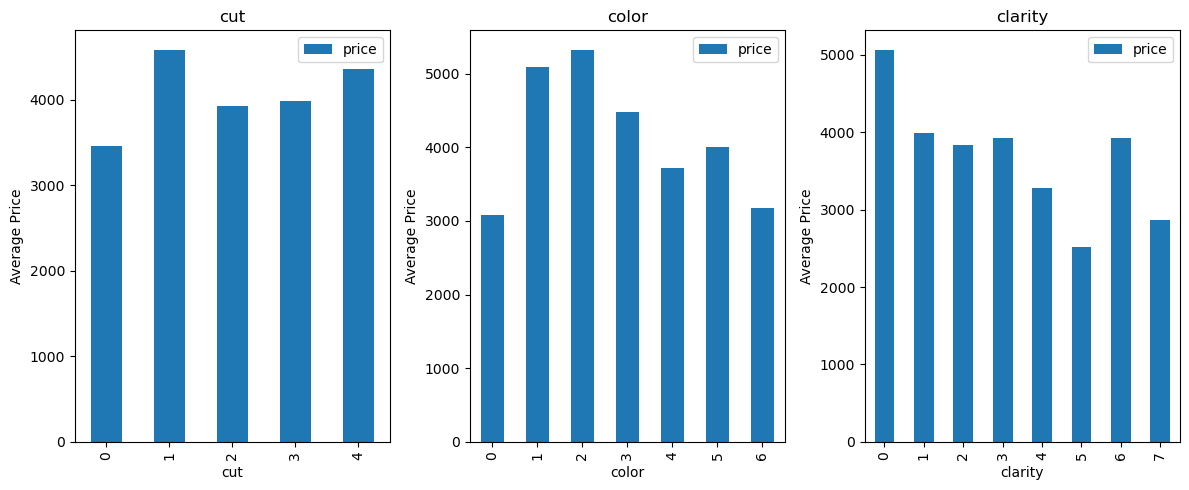

In [39]:
# Run this code without changes
#import matplotlib.pyplot as plt

#categorical_features = diamonds.select_dtypes("object").columns
#fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

#for index, feature in enumerate(categorical_features):
  #  diamonds.groupby(feature).mean().plot.bar(
   #     y="price", ax=axes[index])
    

import matplotlib.pyplot as plt

# 'diamonds' DataFrame has already been converted and numeric codes are in place

categorical_features = ['cut', 'color', 'clarity']

# Create subplots for each categorical feature
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12, 5))

# Plot bar graphs for each categorical feature
for index, feature in enumerate(categorical_features):
    diamonds.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])
    axes[index].set_title(feature)
    axes[index].set_ylabel('Average Price')
    axes[index].set_xlabel(feature)

plt.tight_layout()
plt.show()
    

Identify the name of the categorical predictor column you want to use in your model below. The choice here is more open-ended than choosing the numeric predictor above -- choose something that will be interpretable in a final model, and where the different categories seem to have an impact on the price.

In [42]:
# Replace None with appropriate code
cat_col = "color"

The following code checks that you specified a column correctly:

In [44]:
# Run this cell without changes

# cat_col should be a string
assert type(cat_col) == str

# cat_col should be one of the categorical columns
# assert cat_col in diamonds.select_dtypes("object").columns

### Setting Up Variables for Regression

The code below creates a variable `X_iterated`: a DataFrame containing the column with the strongest correlation **and** your selected categorical feature.

In [45]:
# Run this cell without changes
X_iterated = diamonds[[most_correlated, cat_col]]
X_iterated

,carat,color
1,0.23,0
2,0.21,0
3,0.23,0
4,0.29,1
5,0.31,2
...,...,...
53936,0.72,6
53937,0.72,6
53938,0.70,6
53939,0.86,3


### Preprocessing Categorical Variable

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col`.

**DO NOT** use `drop_first=True`, so that you can intentionally set a meaningful reference category instead.

In [48]:
# Replace None with appropriate code

# Use pd.get_dummies to one-hot encode the categorical column in X_iterated

# Create dummy variables for the categorical column
X_iterated = pd.get_dummies(diamonds[cat_col], prefix=cat_col, drop_first=False)

# Display the resulting DataFrame to check the dummy variables
print(X_iterated.head())



   color_0  color_1  color_2  color_3  color_4  color_5  color_6
1     True    False    False    False    False    False    False
2     True    False    False    False    False    False    False
3     True    False    False    False    False    False    False
4    False     True    False    False    False    False    False
5    False    False     True    False    False    False    False


The following code checks that you have the right number of columns:

In [49]:
# Run this cell without changes

# X_iterated should be a dataframe
assert type(X_iterated) == pd.DataFrame

# You should have the number of unique values in one of the
# categorical columns + 1 (representing the numeric predictor)
valid_col_nums = diamonds.select_dtypes("object").nunique() + 1

# Check that there are the correct number of columns
# (if this crashes, make sure you did not use `drop_first=True`)
assert X_iterated.shape[1] in valid_col_nums.values

AssertionError: 

Now, applying your domain understanding, **choose a column to drop and drop it**. This category should make sense as a "baseline" or "reference". For the "cut_Very Good" column that was generated when `pd.get_dummies` was used, we need to remove the space in the column name.

In [51]:
# Your code here

# X_iterated is the DataFrame containing dummy variables and 'carat' as a predictor
cat_col = "color"
reference_category = "3"

# Create dummy variables for the categorical column
X_iterated = pd.get_dummies(diamonds[cat_col], prefix=cat_col, drop_first=False)

# Handle potential spaces in column names
X_iterated.columns = X_iterated.columns.str.strip()

# Drop the reference category column
X_iterated = X_iterated.drop(columns=[f'{cat_col}_{reference_category}'])

# Optionally: Combine with other predictors if needed
X_iterated = diamonds[['carat']].join(X_iterated)

# Display the resulting DataFrame to check the dropped column
print(X_iterated.head())


   carat  color_0  color_1  color_2  color_4  color_5  color_6
1   0.23     True    False    False    False    False    False
2   0.21     True    False    False    False    False    False
3   0.23     True    False    False    False    False    False
4   0.29    False     True    False    False    False    False
5   0.31    False    False     True    False    False    False


We now need to change the boolean values for the four "cut" column to 1s and 0s in order for the regression to run.

In [55]:

# X_iterated is the DataFrame containing dummy variables and 'carat' as a predictor
cat_col = "color"
reference_category = "3"  # Change the reference category to an appropriate value

# Create dummy variables for the categorical column
X_iterated = pd.get_dummies(diamonds[cat_col], prefix=cat_col, drop_first=False)

# Handle potential spaces in column names
X_iterated.columns = X_iterated.columns.str.strip()

# Drop the reference category column
X_iterated = X_iterated.drop(columns=[f'{cat_col}_{reference_category}'])

# Convert boolean values to 1s and 0s
X_iterated = X_iterated.astype(int)

# Combine with other predictors if needed
X_iterated = diamonds[['carat']].join(X_iterated)

# Display the resulting DataFrame to check the conversion
print(X_iterated.head())


   carat  color_0  color_1  color_2  color_4  color_5  color_6
1   0.23        1        0        0        0        0        0
2   0.21        1        0        0        0        0        0
3   0.23        1        0        0        0        0        0
4   0.29        0        1        0        0        0        0
5   0.31        0        0        1        0        0        0


Now you should have 1 fewer column than before:

In [56]:
# Run this cell without changes

# Check that there are the correct number of columns
assert X_iterated.shape[1] in (valid_col_nums - 1).values

AssertionError: 

## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.

In [57]:
# Your code here
import statsmodels.api as sm

# Define the model
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))

# Fit the model
iterated_results = iterated_model.fit()

# Display the regression results
print(iterated_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.893e+04
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:24:32   Log-Likelihood:            -4.6998e+05
No. Observations:               53940   AIC:                         9.400e+05
Df Residuals:                   53932   BIC:                         9.400e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2868.4707     20.607   -139.200      0.0

## 6. Evaluate and Interpret Multiple Linear Regression Model Results

If the model was set up correctly, the following code will print the results summary.

In [58]:
# Run this cell without changes
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.893e+04
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:25:01   Log-Likelihood:            -4.6998e+05
No. Observations:               53940   AIC:                         9.400e+05
Df Residuals:                   53932   BIC:                         9.400e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2868.4707     20.607   -139.200      0.0

Summarize your findings below. How did the iterated model perform overall? How does this compare to the baseline model? What do the coefficients mean?

Create as many additional cells as needed.

Model Performance
Overall Model Fit:

R-squared:
The iterated model has an R-squared value of 0.864. This indicates that approximately 86.4% of the variance in the price can be explained by the predictors included in this model. This is an improvement from the simple model's R-squared of 0.849.


Adjusted R-squared: The adjusted R-squared is also 0.864, which means that the model's explanatory power has increased while accounting for the number of predictors. This suggests that adding the categorical variable improved the model's performance.
F-statistic:

The F-statistic for the iterated model is 48,930 with a very small p-value (less than 0.05), indicating that the model is statistically significant and the predictors collectively provide a good fit for the data.
Comparison with Baseline Model

R-squared Improvement: The R-squared of the iterated model (0.864) is higher than that of the baseline model (0.849), indicating that incorporating the categorical variable (color) improved the model's explanatory power.



carat: The coefficient is 8066.6230. This means that for each additional carat, the price of the diamond increases by approximately $8066.62, holding other variables constant.

color_0: The coefficient is 638.4605. This indicates that diamonds with the color category represented by color_0 have an average price increase of $638.46 compared to the reference category (which is color_3 in this case).

color_1: The coefficient is -323.4900. Diamonds with the color category color_1 have an average price decrease of $323.49 compared to the reference category.

color_2: The coefficient is -1182.2304. Diamonds with the color category color_2 have an average price decrease of $1182.23 compared to the reference category.

color_4: The coefficient is 651.9790. Diamonds with the color category color_4 have an average price increase of $651.98 compared to the reference category.

color_5: The coefficient is 646.7055. Diamonds with the color category color_5 have an average price increase of $646.71 compared to the reference category.

color_6: The coefficient is 732.2418. Diamonds with the color category color_6 have an average price increase of $732.24 compared to the reference category.

Interpretation of Coefficients
Intercept: The intercept of -2868.4707 represents the expected price of a diamond when all predictor variables are zero. In this context, it’s not particularly meaningful, but it helps in calculating the overall predicted price.

carat: As mentioned, this predictor has a substantial effect on the price, reflecting the importance of carat weight in determining diamond prices.

Categorical Variables (color): The coefficients for the color dummy variables indicate how each color category affects the price compared to the reference category. Positive coefficients mean an increase in price, while negative coefficients indicate a decrease in price.




## Summary

Congratulations, you completed an iterative linear regression process! You practiced developing a baseline and an iterated model, as well as identifying promising predictors from both numeric and categorical features.

Conclusion
Adding the categorical feature (color) to the regression model improved the model's R-squared, suggesting that the color of the diamond has a significant impact on its price. This enhances our understanding of how different factors, including categorical ones, contribute to the price of diamonds.